In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR) # to read the description of dataset.
boston_df = boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
# to see columns
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Create dataset

Create our dataset using `pd.DataFrame()` function. And check the `.head()` of it.

In [6]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [7]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


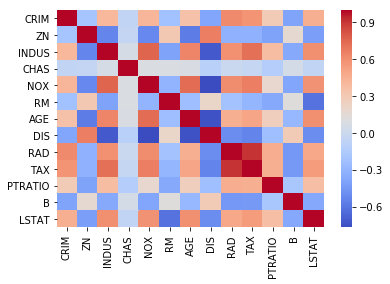

In [15]:
sns.heatmap(df.corr(), cmap="coolwarm")

----
Remember our variables.

**variables = :Attribute Information (in order):**

- CRIM       per capita crime rate by town
- ZN         proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS      proportion of non-retail business acres per town
- CHAS       Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX        nitric oxides concentration (parts per 10 million)
- RM         average number of rooms per dwelling
- AGE        proportion of owner-occupied units built prior to 1940
- DIS        weighted distances to five Boston employment centres
- RAD        index of accessibility to radial highways
- TAX        full-value property-tax rate per 10k dollar
- PTRATIO    pupil-teacher ratio by town
- B          1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT      % lower status of the population
- MEDV       Median value of owner-occupied homes in $1000's" 

Based on our data, let's do how per capita crime rate by town **CRIM** and some other variables will predict full-value property-tax rate per $10,000 dollar **TAX**.

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

In other words: 

-  X columns will be independent variables. Or predictor value/s.
-  Y column will be our dependent variables. Or predicted value.

### X and y arrays

In [17]:
X = df[['CRIM', 'PTRATIO', 'B',]]
y = df['TAX']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating and Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

Instantiate (create an instance of) Linear Regression Model.

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [22]:
# print the intercept
print(lm.intercept_)

87.82181358968023


Create a database for our variables and coefficients, so it is visually better to read.

In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,8.361879
PTRATIO,24.154104
B,-0.423880


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **CRIM (per capita crime rate)** is associated with an increase of \$8.36 of **TAX (full-value property-tax rate per 10k dollar)**.
- Holding all other features fixed, a 1 unit increase in **PTRATIO (pupil-teacher ratio by town)** is associated with an increase of \$24.15 of **TAX (full-value property-tax rate per 10k dollar)**.
- Holding all other features fixed, a 1 unit increase in **B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)** is associated with an decrease of \$0.42 of **TAX (full-value property-tax rate per 10k dollar)**.



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

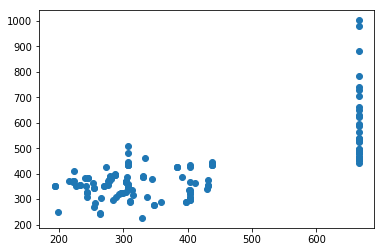

In [24]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

Our model does not seem strong. As you can see there are outliers at the top right.

**Residual Histogram**

Residuals are the differences between actual values and predicted values (ŷ).

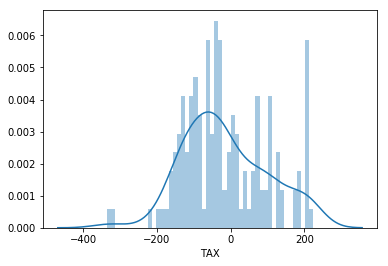

In [26]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 94.67118580576818
MSE: 13096.893952739876
RMSE: 114.44166178774178
